In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Unpack lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 
lat_lngs = zip(lats, lngs)
lat_lngs

# One can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure to unzip the latitudes and longitudes into the coordinates list before moving on.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print (coordinates)

[(-30.748838851126635, -143.4668643369396), (33.22169655124675, 64.8241088131), (-57.3453417113939, 48.52603314316076), (-76.09198535115497, -169.21400347452166), (81.1786331542811, -97.31931573337164), (-63.22149355300361, -114.19330619722983), (-21.372037266042938, -42.25465384829272), (-12.122818105591634, 55.366328164512765), (43.32502136943552, 42.13026500120989), (-69.41937188641444, -2.1821869265111786), (-51.13036928056424, 102.58357178996079), (45.93991881595764, -91.57502577421664), (-84.22278855023441, 46.90190264965895), (75.71964577928122, 170.5305484531042), (-37.48110221031505, 103.44983193643526), (-75.24847009832678, -71.08216735581824), (-67.82973041880514, -126.55964014813024), (17.758917183979918, 122.93799932427822), (-88.70373222407481, -105.60301685767364), (-56.07577056736145, 14.171699922562539), (43.06541297796278, -150.73828025928125), (-65.88097754879357, 59.83749918670787), (79.35111866405506, -3.2492054450552246), (4.344129464726919, 137.63309987393097), (

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [5]:
# Build the basic URL for the OpenWeatherMap with my weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [8]:
cities

['mataura',
 'taywarah',
 'east london',
 'vaini',
 'yellowknife',
 'punta arenas',
 'miracema',
 'sambava',
 'teberda',
 'hermanus',
 'busselton',
 'superior',
 'port alfred',
 'pevek',
 'ushuaia',
 'rikitea',
 'dicabisagan',
 'kodiak',
 'taolanaro',
 'klaksvik',
 'airai',
 'saldanha',
 'jamestown',
 'zhangye',
 'kibondo',
 'stony plain',
 'kruisfontein',
 'chimore',
 'sorvag',
 'solone',
 'isangel',
 'alvaraes',
 'qaanaaq',
 'puerto ayora',
 'pedasi',
 'albany',
 'nikolskoye',
 'port lincoln',
 'cidreira',
 'vaitupu',
 'lagoa',
 'belushya guba',
 'opuwo',
 'lata',
 'pokhara',
 'nantucket',
 'port hardy',
 'campbell river',
 'jiroft',
 'cape town',
 'broome',
 'alofi',
 'mayo',
 'illoqqortoormiut',
 'new norfolk',
 'kapaa',
 'georgetown',
 'pemba',
 'lompoc',
 'bluff',
 'karaton',
 'umzimvubu',
 'butaritari',
 'ende',
 'turukhansk',
 'norman wells',
 'hobart',
 'carutapera',
 'maldonado',
 'jiaonan',
 'los llanos de aridane',
 'faanui',
 'dukat',
 'antofagasta',
 'saint-philippe',
 'p

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | mataura
Processing Record 2 of Set 13 | taywarah
Processing Record 3 of Set 13 | east london
Processing Record 4 of Set 13 | vaini
Processing Record 5 of Set 13 | yellowknife
Processing Record 6 of Set 13 | punta arenas
Processing Record 7 of Set 13 | miracema
Processing Record 8 of Set 13 | sambava
Processing Record 9 of Set 13 | teberda
Processing Record 10 of Set 13 | hermanus
Processing Record 11 of Set 13 | busselton
Processing Record 12 of Set 13 | superior
Processing Record 13 of Set 13 | port alfred
Processing Record 14 of Set 13 | pevek
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | rikitea
Processing Record 17 of Set 13 | dicabisagan
Processing Record 18 of Set 13 | kodiak
Processing Record 19 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 13 | klaksvik
Processing Record 21 of Set 13 | airai
Processing Record 22 of Set 13 | saldanha
Processing Record 23 of Set 13 | jamestown
Processing R

Processing Record 36 of Set 16 | saryshagan
City not found. Skipping...
Processing Record 37 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 16 | avarua
Processing Record 39 of Set 16 | barentsburg
City not found. Skipping...
Processing Record 40 of Set 16 | bela vista do paraiso
Processing Record 41 of Set 16 | iquitos
Processing Record 42 of Set 16 | longyearbyen
Processing Record 43 of Set 16 | alta floresta
Processing Record 44 of Set 16 | carnarvon
Processing Record 45 of Set 16 | gurupi
Processing Record 46 of Set 16 | chaman
Processing Record 47 of Set 16 | whitehorse
Processing Record 48 of Set 16 | halalo
City not found. Skipping...
Processing Record 49 of Set 16 | sokol
Processing Record 50 of Set 16 | ishigaki
Processing Record 1 of Set 17 | derzhavinsk
Processing Record 2 of Set 17 | makakilo city
Processing Record 3 of Set 17 | huarmey
Processing Record 4 of Set 17 | arlit
Processing Record 5 of Set 17 | coruripe
Processing Record 6 of Set 1

Processing Record 21 of Set 20 | saint george
Processing Record 22 of Set 20 | broken hill
Processing Record 23 of Set 20 | baruun-urt
Processing Record 24 of Set 20 | san ignacio
Processing Record 25 of Set 20 | weligama
Processing Record 26 of Set 20 | leini
Processing Record 27 of Set 20 | temaraia
City not found. Skipping...
Processing Record 28 of Set 20 | nola
Processing Record 29 of Set 20 | ohara
Processing Record 30 of Set 20 | stillwater
Processing Record 31 of Set 20 | benghazi
Processing Record 32 of Set 20 | abai
Processing Record 33 of Set 20 | ahipara
Processing Record 34 of Set 20 | salinopolis
Processing Record 35 of Set 20 | kodinsk
Processing Record 36 of Set 20 | payo
Processing Record 37 of Set 20 | gigmoto
Processing Record 38 of Set 20 | harper
Processing Record 39 of Set 20 | haines junction
Processing Record 40 of Set 20 | maragogi
Processing Record 41 of Set 20 | bathsheba
Processing Record 42 of Set 20 | calamar
Processing Record 43 of Set 20 | ituni
City not

Processing Record 4 of Set 24 | seguin
Processing Record 5 of Set 24 | praia da vitoria
Processing Record 6 of Set 24 | snezhnogorsk
Processing Record 7 of Set 24 | kota kinabalu
Processing Record 8 of Set 24 | cayenne
Processing Record 9 of Set 24 | benjamin aceval
Processing Record 10 of Set 24 | campana
Processing Record 11 of Set 24 | aktash
Processing Record 12 of Set 24 | teya
Processing Record 13 of Set 24 | saint-joseph
Processing Record 14 of Set 24 | kedrovyy
Processing Record 15 of Set 24 | shimoda
Processing Record 16 of Set 24 | namatanai
Processing Record 17 of Set 24 | dongsheng
Processing Record 18 of Set 24 | kamenskoye
City not found. Skipping...
Processing Record 19 of Set 24 | rawson
Processing Record 20 of Set 24 | kondinskoye
Processing Record 21 of Set 24 | sabang
Processing Record 22 of Set 24 | illintsi
Processing Record 23 of Set 24 | killybegs
Processing Record 24 of Set 24 | olinda
Processing Record 25 of Set 24 | amalapuram
Processing Record 26 of Set 24 | 

In [10]:
# Tally the number of cities in the city_data array of dictionaries
len(city_data)

560

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,59.49,83,100,3.02,NZ,2022-02-08 22:16:43
1,Taywarah,33.3500,64.4167,6.80,77,1,4.74,AF,2022-02-08 22:16:44
2,East London,-33.0153,27.9116,74.28,87,4,5.28,ZA,2022-02-08 22:16:44
3,Vaini,-21.2000,-175.2000,84.36,89,40,13.80,TO,2022-02-08 22:16:45
4,Yellowknife,62.4560,-114.3525,-10.71,87,99,3.33,CA,2022-02-08 22:13:41
5,Punta Arenas,-53.1500,-70.9167,57.31,41,75,13.80,CL,2022-02-08 22:16:45
6,Miracema,-21.4122,-42.1967,72.99,97,100,1.21,BR,2022-02-08 22:16:46
7,Sambava,-14.2667,50.1667,74.98,91,60,3.27,MG,2022-02-08 22:16:46
8,Teberda,43.4456,41.7448,32.25,88,100,10.36,RU,2022-02-08 22:16:46
9,Hermanus,-34.4187,19.2345,64.90,89,74,7.14,ZA,2022-02-08 22:16:47


In [12]:
# Reorder the Columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-02-08 22:16:43,-46.1927,168.8643,59.49,83,100,3.02
1,Taywarah,AF,2022-02-08 22:16:44,33.3500,64.4167,6.80,77,1,4.74
2,East London,ZA,2022-02-08 22:16:44,-33.0153,27.9116,74.28,87,4,5.28
3,Vaini,TO,2022-02-08 22:16:45,-21.2000,-175.2000,84.36,89,40,13.80
4,Yellowknife,CA,2022-02-08 22:13:41,62.4560,-114.3525,-10.71,87,99,3.33
5,Punta Arenas,CL,2022-02-08 22:16:45,-53.1500,-70.9167,57.31,41,75,13.80
6,Miracema,BR,2022-02-08 22:16:46,-21.4122,-42.1967,72.99,97,100,1.21
7,Sambava,MG,2022-02-08 22:16:46,-14.2667,50.1667,74.98,91,60,3.27
8,Teberda,RU,2022-02-08 22:16:46,43.4456,41.7448,32.25,88,100,10.36
9,Hermanus,ZA,2022-02-08 22:16:47,-34.4187,19.2345,64.90,89,74,7.14


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Weather Data

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644358811.477598

In [16]:
# Use string format method to reformat the datetime stamp.
today = time.strftime("%x")
today

'02/08/22'

## Latitude vs. Max Temperature

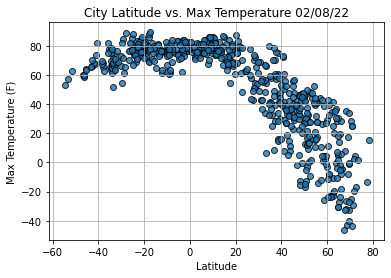

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/LatVsMT.png")

# Show plot.
plt.show()

## Latitude vs. Humidity

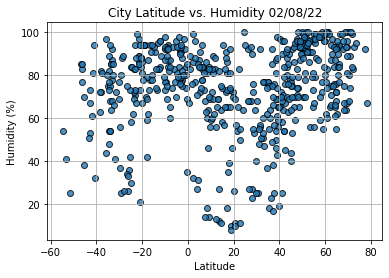

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/LatVsHum.png")
# Show plot.
plt.show()

## Latitude vs. Cloudiness

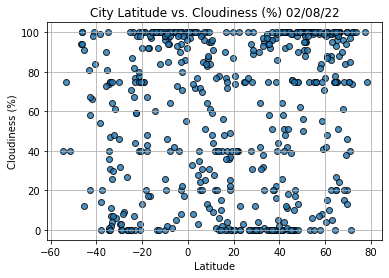

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/LatVsCloud.png")
# Show plot.
plt.show()

## Latitude vs. Wind Speed

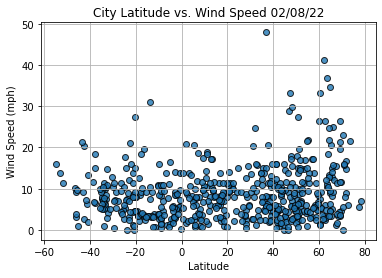

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/LatVsWS.png")

# Show plot.
plt.show()

# Determine Correlations

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create a new DataFrame from the current DataFrame 
# Use loc method to get a specific row from a current DataFrame 
index13 = city_data_df.loc[13]
index13

City                        Pevek
Country                        RU
Date          2022-02-08 22:12:32
Lat                       69.7008
Lng                      170.3133
Max Temp                   -32.37
Humidity                      100
Cloudiness                     46
Wind Speed                    4.7
Name: 13, dtype: object

In [23]:
# Filter the DF for all Northern Hemisphere latitudes >= 0
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
555     True
556    False
557     True
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [24]:
# Create a DF with all data fitting the criteria from above, for latitudes greater than or equal to 0, using the loc method
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Taywarah,AF,2022-02-08 22:16:44,33.3500,64.4167,6.80,77,1,4.74
4,Yellowknife,CA,2022-02-08 22:13:41,62.4560,-114.3525,-10.71,87,99,3.33
8,Teberda,RU,2022-02-08 22:16:46,43.4456,41.7448,32.25,88,100,10.36
11,Superior,US,2022-02-08 22:16:48,46.7208,-92.1041,37.71,59,0,9.22
13,Pevek,RU,2022-02-08 22:12:32,69.7008,170.3133,-32.37,100,46,4.70


## Northern & Southern Hemisphere DataFrames

In [25]:
# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Taywarah,AF,2022-02-08 22:16:44,33.3500,64.4167,6.80,77,1,4.74
4,Yellowknife,CA,2022-02-08 22:13:41,62.4560,-114.3525,-10.71,87,99,3.33
8,Teberda,RU,2022-02-08 22:16:46,43.4456,41.7448,32.25,88,100,10.36
11,Superior,US,2022-02-08 22:16:48,46.7208,-92.1041,37.71,59,0,9.22
13,Pevek,RU,2022-02-08 22:12:32,69.7008,170.3133,-32.37,100,46,4.70


In [26]:
# Create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-02-08 22:16:43,-46.1927,168.8643,59.49,83,100,3.02
2,East London,ZA,2022-02-08 22:16:44,-33.0153,27.9116,74.28,87,4,5.28
3,Vaini,TO,2022-02-08 22:16:45,-21.2000,-175.2000,84.36,89,40,13.80
5,Punta Arenas,CL,2022-02-08 22:16:45,-53.1500,-70.9167,57.31,41,75,13.80
6,Miracema,BR,2022-02-08 22:16:46,-21.4122,-42.1967,72.99,97,100,1.21


## Correlation Between Latitude and Maximum Temperature

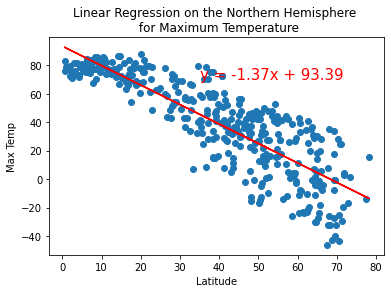

<Figure size 432x288 with 0 Axes>

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(35,70))

# Save the figure.
plt.savefig("weather_data/LinRegNorHemMT.png")

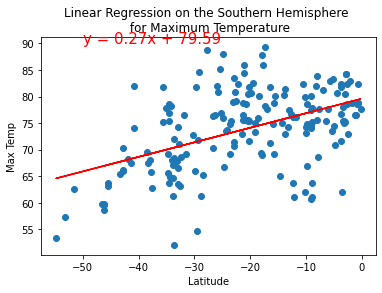

<Figure size 432x288 with 0 Axes>

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Save the figure.
plt.savefig("weather_data/LinRegSouHemMT.png")

## Correlation Between Latitude and Percent Humidity

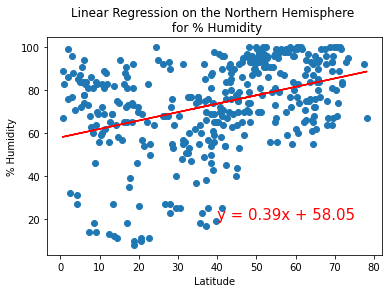

<Figure size 432x288 with 0 Axes>

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

# Save the figure.
plt.savefig("weather_data/LinRegNorHemH.png")

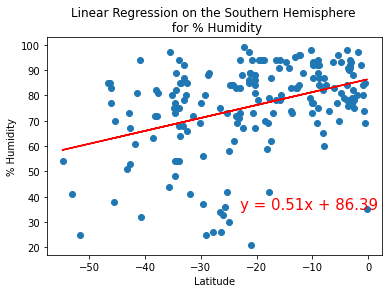

<Figure size 432x288 with 0 Axes>

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-23,35))

# Save the figure.
plt.savefig("weather_data/LinRegSouHemH.png")

## Correlation Between Latitude and Percent Cloudiness

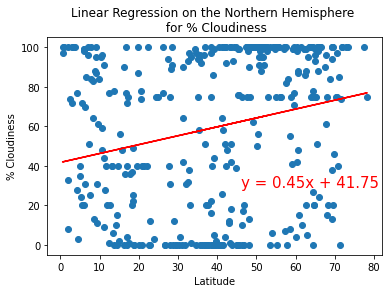

<Figure size 432x288 with 0 Axes>

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(46,29))

# Save the figure.
plt.savefig("weather_data/LinRegNorHemC.png")

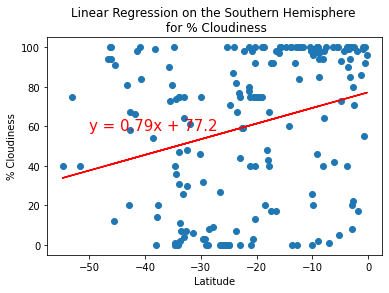

<Figure size 432x288 with 0 Axes>

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,58))

# Save the figure.
plt.savefig("weather_data/LinRegSouHemC.png")

## Correlation Between Latitude and Wind Speed

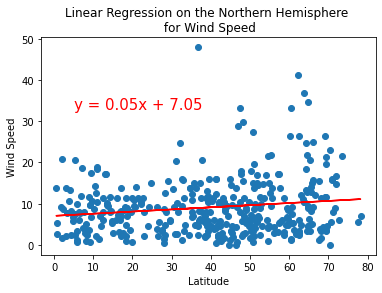

<Figure size 432x288 with 0 Axes>

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,33))

# Save the figure.
plt.savefig("weather_data/LinRegNorHemWS.png")

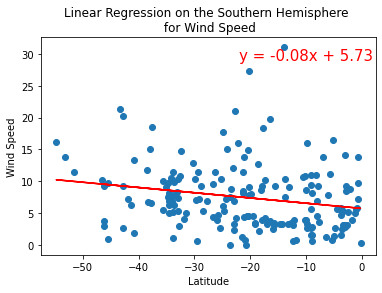

<Figure size 432x288 with 0 Axes>

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-22,29))

# Save the figure.
plt.savefig("weather_data/LinRegSouHemWS.png")